In [1]:
import torch
from torch import nn
from torch import optim
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

c:\Users\bmbar\anaconda3\envs\tf\lib\site-packages\transformers\utils\generic.py:485: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
transform=transforms.ToTensor()

mnist=datasets.MNIST(root='./',train=True,download=True,transform=transform)

data_loader=torch.utils.data.DataLoader(dataset=mnist,batch_size=64,shuffle=True)

In [3]:
dataiter=iter(data_loader)
images,labels=next(dataiter)
print(torch.max(images),torch.min(images))

tensor(1.) tensor(0.)


In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder=nn.Sequential(
            nn.Linear((28*28),128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,12),
            nn.ReLU(),
            nn.Linear(12,3)
        )

        self.decoder=nn.Sequential(
            nn.Linear(3,12),
            nn.ReLU(),
            nn.Linear(12,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,(28*28)),
            nn.Sigmoid(),
        )

    def forward(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded
    

In [8]:
model=Autoencoder()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model=model.to(device)
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-5)

In [9]:
num_epochs=2
ouput=[]
for epoch in range(num_epochs):
    for (img,_) in data_loader:
        img=img.to(device)
        img=img.reshape(-1,28*28)
        recon=model(img)
        loss=criterion(recon,img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    ouput.append((epoch,img,recon))

Epoch:1, Loss:0.0455
Epoch:2, Loss:0.0391


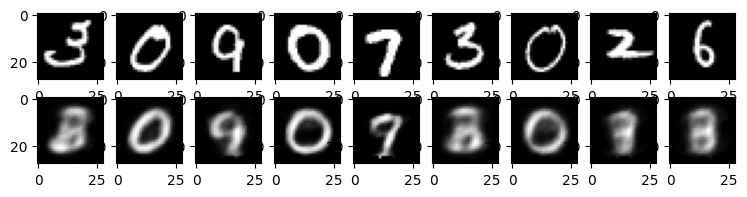

In [11]:
for k in range(0,num_epochs,4):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = ouput[k][1].cpu().detach().numpy()
    recon = ouput[k][2].cpu().detach().numpy()
    for i,item in enumerate(imgs):
        if i>=9: break
        plt.subplot(2,9,i+1)
        item=item.reshape(-1,28,28)
        plt.imshow(item[0])

    for i,item in enumerate(recon):
        if i>=9:break
        plt.subplot(2,9,9+i+1)
        item=item.reshape(-1,28,28)
        plt.imshow(item[0])

In [14]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder=nn.Sequential(
            nn.Conv2d(1,16,3,stride=2,padding=1),
            nn.ReLU(),
            nn.Conv2d(16,32,3,stride=2,padding=1),
            nn.ReLU(),
            nn.Conv2d(32,64,7)
        )

        self.decoder=nn.Sequential(
            nn.ConvTranspose2d(64,32,7),
            nn.ReLU(),
            nn.ConvTranspose2d(32,16,3,stride=2,padding=1,output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16,1,3,stride=2,padding=1,output_padding=1),
            nn.Sigmoid(),
        )

    def forward(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded
    

In [15]:
model=Autoencoder()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model=model.to(device)
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-5)

In [20]:
num_epochs=10
ouput=[]
for epoch in range(num_epochs):
    for (img,_) in data_loader:
        img=img.to(device)
        recon=model(img)
        loss=criterion(recon,img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    ouput.append((epoch,img,recon))

Epoch:1, Loss:0.0041
Epoch:2, Loss:0.0031
Epoch:3, Loss:0.0035
Epoch:4, Loss:0.0031
Epoch:5, Loss:0.0030
Epoch:6, Loss:0.0029
Epoch:7, Loss:0.0027
Epoch:8, Loss:0.0028
Epoch:9, Loss:0.0032
Epoch:10, Loss:0.0028


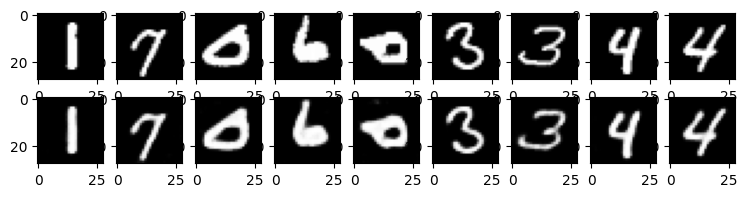

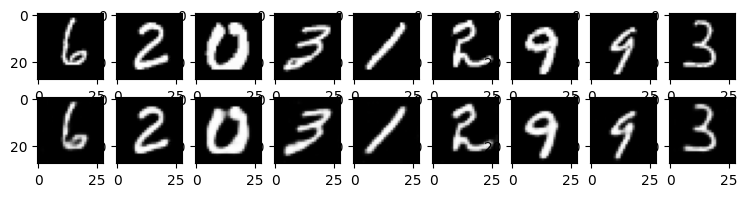

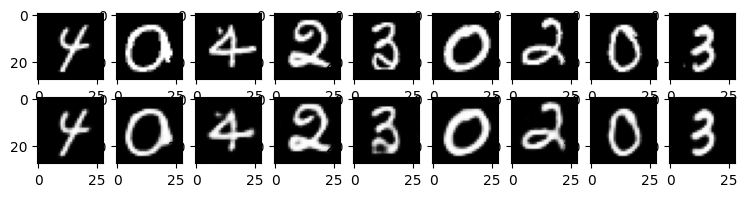

In [21]:
for k in range(0,num_epochs,4):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = ouput[k][1].cpu().detach().numpy()
    recon = ouput[k][2].cpu().detach().numpy()
    for i,item in enumerate(imgs):
        if i>=9: break
        plt.subplot(2,9,i+1)
        plt.imshow(item[0])

    for i,item in enumerate(recon):
        if i>=9:break
        plt.subplot(2,9,9+i+1)
        item=item.reshape(-1,28,28)
        plt.imshow(item[0])